## Исследование объявлений о продаже квартир
<b>Цель:</b> установить параметры и  определить рыночную стоимость объектов недвижимости на основе объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

### Шаг 1. Откройте файл с данными и изучите общую информацию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_est=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

data_est.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
pd.set_option('chained_assignment', None) 

In [3]:
#просмотр общей информации о датасете
data_est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#оцениваем в каких столбцах пропуски
data_est.isnull().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
#пробую просмотреть процент пропущенных
pd.DataFrame(round((data_est.isna().mean()*100),2)).style.background_gradient('ocean') 

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.360000
living_area,8.030000
floor,0.000000
is_apartment,88.290000


<b>Вывод:</b> 
    Обнаружены нулевые значения в ряде столбцов и несоотвествие типов данных.

### Шаг 2. Предобработка данных

#### Обработка пропусков

In [6]:
#обработка пропусков в стобце аппартаменты
data_est['is_apartment']=data_est['is_apartment'].fillna(value=False) 

#пропуски в графе балконы +замена на тип int
data_est['balcony']=data_est['balcony'].fillna(value=0).astype('int')


<b>Вывод:</b> 
             
Отсуствующие данные в графе "балконы" свидетельствуют скорее всего о том, что балкона действительно нет в квартире, целесообразно заменить на 0.

Отсуствиующие данные в графе "апартаменты" свидетельствуют скорее всего о том, что объект не является апартаментами,однако при формировании записей этот столбец не заполнялся, целесообразно заменить на False

In [7]:
#просмотр данных по населенному пункту
data_est['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

<b>Вывод:</b> 
   Нет связанных столбцов, чтобы определить данные о каком населенном пункту пропущены, так как пропуско сравнительно немного, рационально оставить иъ без изменения.

In [8]:
#пропуски в графе парки
data_est['parks_around3000']=data_est['parks_around3000'].fillna(value='')
data_est['parks_nearest']=data_est['parks_nearest'].fillna(value='')
       
data_est.loc[((data_est['parks_around3000'] == '') &
              (data_est['parks_nearest'] == '')),('parks_nearest','parks_around3000')]=0
data_est.loc[((data_est['parks_around3000'] == 0) &
              (data_est['parks_nearest'] == '')),('parks_nearest')]=0


In [9]:
data_est.loc[((data_est['parks_around3000'] == 0) & (data_est['parks_nearest'] != 0))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,NaN,18.0,37.0,13,False,...,10.0,0,Санкт-Петербург,14878.0,9791.0,0,3064,1.0,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,NaN,5.0,17.7,2,False,...,5.5,0,Санкт-Петербург,14821.0,9734.0,0,3190,1.0,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.0,2.0,80.0,2,False,...,17.0,1,Санкт-Петербург,36805.0,8656.0,0,3013,3.0,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.6,5.0,16.5,1,False,...,5.5,0,Санкт-Петербург,14821.0,9734.0,0,3190,1.0,431.0,176.0


Очевидно, что как минимум три из 4 объектов находятся рядом. Блишайший парк для них чуть дальше чем 3 км, таким образом можно оставить тут 0.


In [10]:
data_est.loc[((data_est['parks_around3000'] != 0) & (data_est['parks_nearest'] == 0))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [11]:
#пропуски в графе пруды

data_est['ponds_around3000']=data_est['ponds_around3000'].fillna(value='')
data_est['ponds_nearest']=data_est['ponds_nearest'].fillna(value='')

        
data_est.loc[((data_est['ponds_around3000'] == '') &
              (data_est['ponds_nearest'] == '')),('ponds_nearest','ponds_around3000')]=0
data_est.loc[((data_est['ponds_around3000'] == 0) &
              (data_est['ponds_nearest'] == '')),('ponds_nearest')]=0

In [12]:
data_est.loc[((data_est['ponds_around3000'] == 0) & (data_est['ponds_nearest'] != 0))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


<b>Вывод:</b> 

Скорее всего, если одновременно не указаны значения в столбцах 'parks_around3000' и 'parks_nearest', то в радиусе 3000 м парков нет, можно заменить значения на 0. 

Так же проверить если в столбце 'parks_around3000' указан 0, а в 'parks_nearest' пропуск, следует заменить в 'parks_nearest' на 0.

Отельно было прверено если в столбце 'parks_nearest' значение есть, а в 'parks_around3000' пропущено. Это говорит о том, что в парк есть, но дальше чем 3000 м. В этом случае в стоблце 'parks_around3000' остается 0. 

Точно такая же ситуация в столбцах с прудами.

In [13]:
data_est['ceiling_height'].unique() #просмотр уникальных значений по столбцу "потолки"

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [14]:
data_est['ceiling_height'].describe() #просмотр распределения данных по столбцу "потолки"

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [15]:
#пропуков много, оставим в графе нулевые значения, так удобнее их при анализе увидеть
data_est['ceiling_height']=data_est['ceiling_height'].fillna(value=0)

In [16]:
#обработка пропусков в графе жилая площадь
data_area=data_est[['rooms','living_area','kitchen_area']]
data_area=data_area.groupby('rooms').mean()
data_area.head(5)

,living_area,kitchen_area
rooms,,
0,18.865246,NaN
1,17.893552,9.550118
2,31.736849,9.979584
3,47.387941,11.308580
4,66.983223,13.664033


In [17]:
data_area['kitchen_area']=data_area['kitchen_area'].fillna(value=0) #замена пропущенного значения на 0

In [18]:
data_area

,living_area,kitchen_area
rooms,,
0,18.865246,0.000000
1,17.893552,9.550118
2,31.736849,9.979584
3,47.387941,11.308580
4,66.983223,13.664033
5,100.009247,18.367649
6,130.983636,21.048763
7,163.564151,21.998077
8,168.683333,24.866667


In [19]:
list_room=data_area.index.tolist()
list_area=data_area['living_area'].tolist()
list_area_k=data_area['kitchen_area'].tolist()

In [20]:
data_est['living_area']=data_est['living_area'].fillna(value='')
data_est['kitchen_area']=data_est['kitchen_area'].fillna(value='')

for i in range(len(list_room)):
    data_est.loc[(data_est['rooms'] == list_room[i]) 
                 & (data_est['living_area'] == ''),('living_area')]=list_area[i]
    data_est.loc[(data_est['rooms'] == list_room[i]) 
                 & (data_est['kitchen_area'] == ''),('kitchen_area')]=list_area_k[i]

In [21]:
data_est.loc[(data_est['living_area'] == '')] #проверка замены

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [22]:
data_est.loc[(data_est['kitchen_area'] == '')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


<b>Вывод:</b> Произведена замена в столбцах 'kitchen_area' и 'living_area', исходя из предположения, что в зависимости от числа комнат похожи жилые площади и площади кухни.

In [23]:
#замена дней экспозиции и типа данных
data_est['days_exposition']=data_est['days_exposition'].fillna(value=0).astype('int')

In [24]:
#замена на 0, чтобы можно было их увидеть при анализе
data_est['cityCenters_nearest']=data_est['cityCenters_nearest'].fillna(value=0)

In [25]:
data_est.isnull().sum() #просмотр пропусков после замены 

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest        5542
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

In [26]:
data_est['locality_name']=data_est['locality_name'].str.lower() #замена регистра
data_est['locality_name']=data_est['locality_name'].str.replace('ё','е') #замена ё на е

data_est['locality_name'].unique() #просмотр того, что получилось по столбцу с населенным пунктом после обработки

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

#### Изменение типов данных

In [27]:

data_est['last_price']=data_est['last_price'].astype('int')

data_est['parks_around3000']=data_est['parks_around3000'].astype('int')
data_est['ponds_around3000']=data_est['ponds_around3000'].astype('int')

data_est['parks_nearest']=data_est['parks_nearest'].astype('int')
data_est['ponds_nearest']=data_est['ponds_nearest'].astype('int')

data_est['total_area']=data_est['total_area'].astype('int')
data_est['kitchen_area']=data_est['total_area'].astype('int')

data_est['rooms']=data_est['rooms'].astype('int')

data_est['first_day_exposition']=pd.to_datetime(data_est['first_day_exposition'],format='%Y%m%dT%H:%M:%S')
data_est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  int64         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  object        
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  int64         
 13  balcony         

<b>Результаты предобработки</b>

total_images  без изменения              
last_price    без изменения               
total_area    без изменения               
first_day_exposition  --- > тип заменен на datetime
rooms                 --- >  тип заменен на int
ceiling_height --- > замена на 0     
floors_total   без изменения                      
living_area   --- > пропуски заменены на среднее по группам                
floor         без изменения                       
is_apartment  --- > пропуски заменены на False, тип на bool        
studio        без изменения                       
open_plan     без изменения                        
kitchen_area  --- > пропуски заменены на среднее по группам        
balcony       --- > пропуски заменены на 0, тип на int             
locality_name  без изменения       
airports_nearest --- > пропуски заменены на среднее, тип на int     
cityCenters_nearest   без изменения               
parks_around3000  --- > пропуски заменены на 0, тип на int                 
parks_nearest     --- > пропуски заменены на 0        
ponds_around3000  --- > пропуски заменены на 0, тип на int                  
ponds_nearest     --- > пропуски заменены на 0     
days_exposition   --- >  пропуски заменены на 0, тип на int                      


### Шаг 3. Посчитайте и добавьте в таблицу

цену квадратного метра;

день недели, месяц и год публикации объявления;

этаж квартиры; варианты — первый, последний, другой;

соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [28]:
#создание дополнительных столбцов
data_est['price_1m']=data_est['last_price']/data_est['total_area'] #цена 1 кв.метра
data_est['total/living']=data_est['living_area']/data_est['total_area'] #соотношение жилой и общей
data_est['kitchen/living']=data_est['kitchen_area']/data_est['total_area'] #соотношение кухни и общей
data_est['day of week']=data_est['first_day_exposition'].dt.weekday #день недели публикации
data_est['year']= data_est['first_day_exposition'].dt.year #год публикации
data_est['month']=data_est['first_day_exposition'].dt.month #месяц пцбликации


In [29]:
#добавление градации этажей
def status_floor(row):
    
    row1=row['floor']
    row2=row['floors_total'] 
   
    if  row1 ==1:
        return 'первый этаж'
    elif row1==row2:
        return 'последний этаж'
    return 'другой'
    
#добавление именованного дня недели    
def data_weekday(day):  
    
    if  day==0:
        return 'понедельник'
    if day==1:
        return 'вторник'
    if day==2:
        return 'среда'
    if day==3:
        return 'четверг'
    if day==4:
        return 'пятница'
    if day==5:
        return 'суббота'
    if day==6:
        return 'воскресенье'
  
 
#добавление именованного названия месяца
def data_month(month):  
    
    if  month==1:
        return 'январь'
    if month==2:
        return 'февраль'
    if month==3:
        return 'март'
    if month==4:
        return 'апрель'
    if month==5:
        return 'май'
    if month==6:
        return 'июнь'
    if month==7:
        return 'июль'
    if  month==8:
        return 'август'
    if month==9:
        return 'сентябрь'
    if month==10:
        return 'октябрь'
    if month==11:
        return 'ноябрь'
    if month==12:
        return 'декабрь'
 
    
data_est['status_floor']=data_est.apply(status_floor,axis=1) #добавление статуса для этажа
data_est['day of week']=data_est['day of week'].apply(data_weekday) #замена дня недели на "понедельник","вторник"...
data_est['month']=data_est['month'].apply(data_month) #замена индекса месяца на "январь","февраль"...

In [30]:
data_est.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_1m,total/living,kitchen/living,day of week,year,month,status_floor
0,20,13000000,108,2019-03-07,3,2.70,16.0,51,8,False,...,2,755,0,120370.370370,0.472222,1.0,четверг,2019,март,другой
1,7,3350000,40,2018-12-04,1,0.00,11.0,18.6,1,False,...,0,0,81,83750.000000,0.465,1.0,вторник,2018,декабрь,первый этаж
2,10,5196000,56,2015-08-20,2,0.00,5.0,34.3,4,False,...,2,574,558,92785.714286,0.6125,1.0,четверг,2015,август,другой
3,0,64900000,159,2015-07-24,3,0.00,14.0,47.3879,9,False,...,3,234,424,408176.100629,0.298037,1.0,пятница,2015,июль,другой
4,2,10000000,100,2018-06-19,2,3.03,14.0,32,13,False,...,1,48,121,100000.000000,0.32,1.0,вторник,2018,июнь,другой


<b>Вывод:</b>  Выполнено добавление добавление столюцов с данными по цене квадратного метра; дня недели, месяца и года публикации объявления; этажа квартиры; соотношения жилой и общей площади, а также отношения площади кухни к общей.

### Шаг 4. Исследовательский анализ данных

### 1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

#### Площадь

In [31]:
#изучение площади
data_est['total_area'].describe()

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

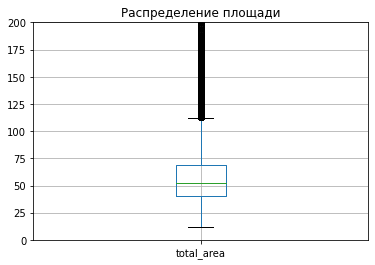

In [32]:
plt.ylim(0,200)
data_est.boxplot(column='total_area')
plt.title('Распределение площади')
plt.show()

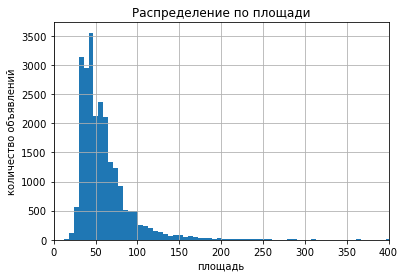

In [33]:
plt.xlim(0,400)
data_est['total_area'].hist(bins=150)
plt.title('Распределение по площади')
plt.xlabel('площадь')
plt.ylabel('количество объявлений')
plt.show()

<b>Вывод:</b> нормальное распределение, медиана близка по значению к средней, средняя площадь составляет около 60 кв.м.

#### Цена

In [34]:
data_price=data_est[['locality_name','last_price']]
data_price['last_price']=data_price['last_price']*0.001

data_price['last_price'].describe()

count     23699.000000
mean       6541.548772
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

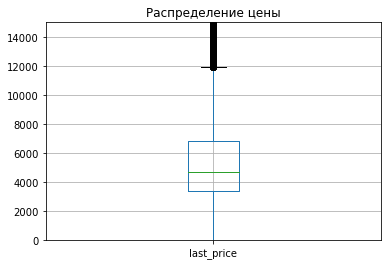

In [35]:
plt.ylim(0,15000)
data_price.boxplot()
plt.title('Распределение цены')
plt.show()

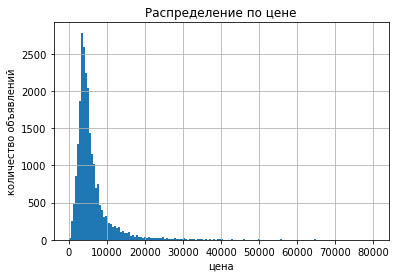

In [36]:
data_price['last_price'].hist(bins=150,range=(0,80000))
plt.title('Распределение по цене')
plt.xlabel('цена')
plt.ylabel('количество объявлений')
plt.show()

#### Вывод:
Видно, что в средняя цена составляет около 6,5 млн, медиана отличается и составляет 4,6 млн. значения колеблятся на достаточно большом промежутке, распределение нормальное. Присутствует странное значение цены в 12 190 р.

#### Количество комнат

In [37]:
data_rooms=data_est[['locality_name','rooms']]
data_est['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

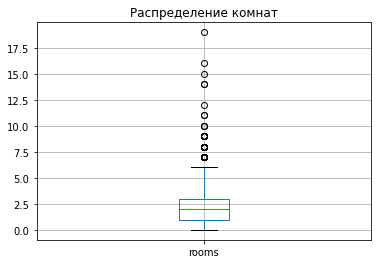

In [38]:
data_rooms.boxplot()
plt.title('Распределение комнат')
plt.show()

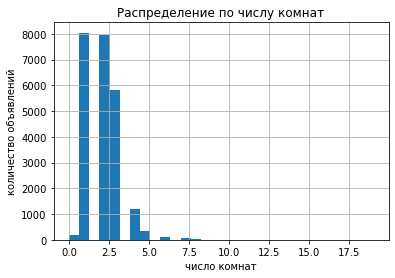

In [39]:
data_est['rooms'].hist(bins=30)
plt.title('Распределение по числу комнат')
plt.xlabel('число комнат')
plt.ylabel('количество объявлений')
plt.show()

<b>Вывод</b>: Большая часть значений лежит в промежутке от 1 до 3, больше всего продавались однокомнатные квартиры.
Есть странные значения - 0 или 19 комнат.

#### Потолки

In [40]:
data_est['ceiling_height'].describe()

count    23699.000000
mean         1.696182
std          1.672495
min          0.000000
25%          0.000000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

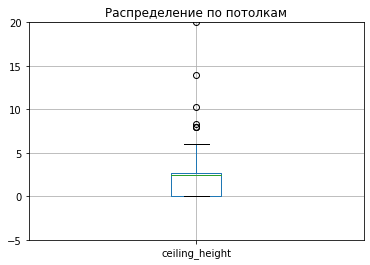

In [41]:
plt.ylim(-5,20)
data_est.boxplot(column='ceiling_height');
plt.title('Распределение по потолкам')
plt.show()

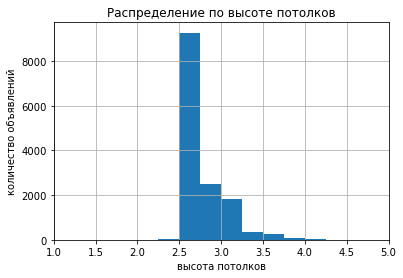

In [42]:
plt.xlim(1,5)
data_est['ceiling_height'].hist(bins=40,range=(0,10))
plt.title('Распределение по высоте потолков')
plt.xlabel('высота потолков')
plt.ylabel('количество объявлений')
plt.show()

#### Вывод:
Видно, что в данных есть странные значения (потолок в 100 метров - максимальное, потолок в 1 метр - минимальное)
Тем не менее среднее значение и медиана - 2,7 метра, основная часть значений не превышает 3 м. 

### 2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [43]:
#была замена пропусков на 0, логично при расчете средней и медианы  их не учитывать, выбираем ненулевые значения
data_exp_nonull=data_est.query('days_exposition != 0') 

In [44]:
print(data_exp_nonull['days_exposition'].mean()) #расчет среднего
print(data_exp_nonull['days_exposition'].median()) #расчет медианы

180.88863436982163
95.0


In [45]:
data_exp_nonull['days_exposition'].describe() #просмотр сводных данных по столбцу

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

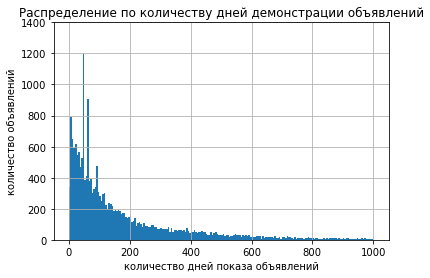

In [46]:
plt.ylim(0,1400)
data_exp_nonull['days_exposition'].hist(bins=200,range=(0,1000))
plt.title('Распределение по количеству дней демонстрации объявлений')
plt.xlabel('количество дней показа объявлений')
plt.ylabel('количество объявлений')
plt.show()

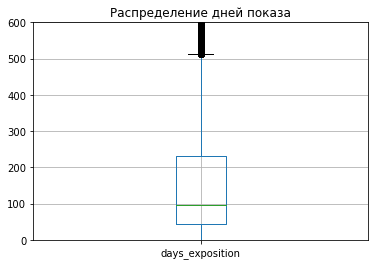

In [47]:
plt.ylim(0,600)
data_exp_nonull.boxplot(column='days_exposition')
plt.title('Распределение дней показа')
plt.show()

In [48]:
data_exp_nonull[data_exp_nonull['days_exposition']<=7] #просмотр объявлений со сроком продажи 7 дней и менее

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_1m,total/living,kitchen/living,day of week,year,month,status_floor
11,9,3300000,44,2018-08-27,2,0.00,5.0,31,4,False,...,0,0,7,75000.000000,0.704545,1.0,понедельник,2018,август,другой
53,7,4300000,39,2017-11-10,1,0.00,25.0,15.4,13,False,...,0,0,6,110256.410256,0.394872,1.0,пятница,2017,ноябрь,другой
62,0,4800000,78,2017-09-17,3,2.80,9.0,48.8,5,False,...,0,0,5,61538.461538,0.625641,1.0,воскресенье,2017,сентябрь,другой
94,3,3500000,29,2019-04-26,1,2.50,5.0,15.6,2,False,...,0,0,4,120689.655172,0.537931,1.0,пятница,2019,апрель,другой
106,9,10500000,124,2017-05-25,5,3.20,4.0,79.4,3,False,...,0,0,6,84677.419355,0.640323,1.0,четверг,2017,май,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23503,11,3530000,36,2017-11-17,1,0.00,10.0,19.1,8,False,...,2,129,4,98055.555556,0.530556,1.0,пятница,2017,ноябрь,другой
23513,12,8300000,62,2017-02-15,2,2.70,16.0,32.9,8,False,...,0,0,7,133870.967742,0.530645,1.0,среда,2017,февраль,другой
23596,10,3500000,43,2017-12-05,2,2.50,9.0,27,6,False,...,0,0,6,81395.348837,0.627907,1.0,вторник,2017,декабрь,другой
23606,0,2850000,68,2018-07-29,1,3.00,5.0,41,3,False,...,3,327,4,41911.764706,0.602941,1.0,воскресенье,2018,июль,другой


In [49]:
data_exp_nonull[data_exp_nonull['days_exposition']>=400] #просмотр объявлений со сроком продажи 7 дней и менее

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_1m,total/living,kitchen/living,day of week,year,month,status_floor
2,10,5196000,56,2015-08-20,2,0.00,5.0,34.3,4,False,...,2,574,558,92785.714286,0.6125,1.0,четверг,2015,август,другой
3,0,64900000,159,2015-07-24,3,0.00,14.0,47.3879,9,False,...,3,234,424,408176.100629,0.298037,1.0,пятница,2015,июль,другой
17,6,4180000,36,2016-09-09,1,0.00,17.0,16.5,7,False,...,1,859,571,116111.111111,0.458333,1.0,пятница,2016,сентябрь,другой
23,11,2950000,32,2016-10-29,1,2.60,9.0,17.7,9,False,...,1,190,615,92187.500000,0.553125,1.0,суббота,2016,октябрь,последний этаж
35,6,15500000,149,2017-06-26,5,0.00,5.0,104,4,False,...,1,779,644,104026.845638,0.697987,1.0,понедельник,2017,июнь,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23672,5,3000000,30,2016-06-08,1,0.00,5.0,16.1,3,False,...,0,0,808,100000.000000,0.536667,1.0,среда,2016,июнь,другой
23675,8,3550000,39,2016-10-03,1,0.00,16.0,19,13,False,...,0,0,721,91025.641026,0.487179,1.0,понедельник,2016,октябрь,другой
23691,11,9470000,72,2016-10-13,2,2.75,25.0,40.3,7,False,...,1,806,519,131527.777778,0.559722,1.0,четверг,2016,октябрь,другой
23692,2,1350000,30,2017-07-07,1,0.00,5.0,17.5,4,False,...,0,0,413,45000.000000,0.583333,1.0,пятница,2017,июль,другой


#### Вывод:
Видно, что в среднем длительность продажи квартиры составляет 180 дней. Медиана составляет 95 дней. 

Вероятно слишком быстрой продажу можно считать, если она прошла за 7 дней и менее (в данных минимальное значение 1 день!), таких данных 848.

Слишком долгой можно считать значения, лежащие выше 400 дней (по данным гистограммы). Таких данных достаточно много 2654.

Также обнаружены выбивающиеся значения (аномалии) в промежутке до 200 дней, которые необходимо проанализировать и убрать.

### 3.  Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

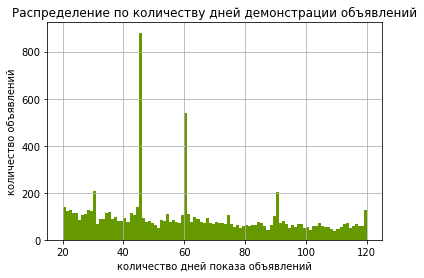

In [50]:
#для обнаружения аномальных значений строим дополнительную гистограмму, методом подбора выбран промежуток от 20 до 150 
data_exp_nonull['days_exposition'].hist(bins=100,range=(20,120),color='#669900')
plt.title('Распределение по количеству дней демонстрации объявлений')
plt.xlabel('количество дней показа объявлений')
plt.ylabel('количество объявлений')
plt.show()

<AxesSubplot:>

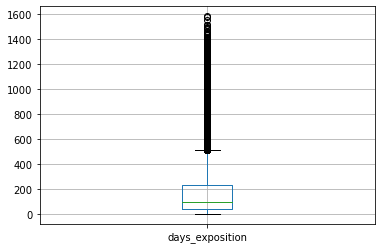

In [51]:
#посмотрим на гистограмме
data_exp_nonull.boxplot(column='days_exposition')

In [52]:
#посмотрим на Q1
Q1=data_exp_nonull['days_exposition'].quantile(0.25)
Q1

45.0

In [53]:
#посмотрим на Q3
Q3=data_exp_nonull['days_exposition'].quantile(0.75)
Q3

232.0

In [54]:
#расчет межквартильного диапазона + верхней усы
iqr_d=Q3-Q1
max_d=Q3+1.5*iqr_d
max_d

512.5

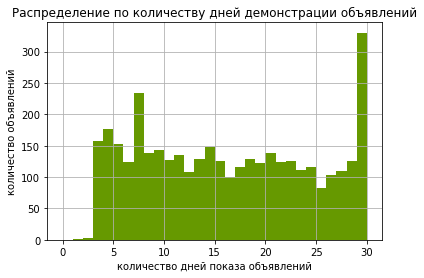

In [55]:
#отдельно просмотрим пик от 0 до 30 дней
data_exp_nonull['days_exposition'].hist(bins=30,range=(0,30),color='#669900')
plt.title('Распределение по количеству дней демонстрации объявлений')
plt.xlabel('количество дней показа объявлений')
plt.ylabel('количество объявлений')
plt.show()

In [56]:
#поиск точно значения аномалий
anom_days=data_exp_nonull.query('days_exposition >=20 and days_exposition<=120')
anom_days.sort_values(by='days_exposition', ascending=False, inplace=False)
anom_days['days_exposition'].value_counts()

45     880
60     538
30     208
90     204
20     139
      ... 
110     48
108     46
87      43
101     42
109     39
Name: days_exposition, Length: 101, dtype: int64

Обнаружены аномалии 7, 30, 45 дня, 60 дней и 90. Их следует убрать.

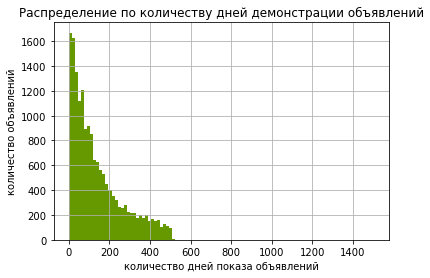

In [57]:
#отрежем необычные значения и выбросы
good_data_days=data_exp_nonull.query ('days_exposition !=7 and days_exposition !=30 and days_exposition !=45 and days_exposition !=60 and days_exposition !=90 and days_exposition <=@max_d')
good_data_days['days_exposition'].hist(bins=100,range=(1,1500),color='#669900')
plt.title('Распределение по количеству дней демонстрации объявлений')
plt.xlabel('количество дней показа объявлений')
plt.ylabel('количество объявлений')
plt.show()

In [58]:
#посмотрим как изменились медиана и средняя
good_data_days['days_exposition'].describe()

count    16785.00000
mean       138.74078
std        124.98519
min          1.00000
25%         40.00000
50%         99.00000
75%        201.00000
max        512.00000
Name: days_exposition, dtype: float64

<b>Вывод:</b> Медиана и средняя стали ближе, сместился верхний квартиль. Ряд выглядит более сглаженным. 
Причины подобных всплесков в "круглых" значениях могут быть различными, следует уточнять у тех, кто выгружал данные.
  

### 4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца, года.

#### Зависимость цены от площади 

In [59]:
#для анализа будем брать значение цены за 1 кв.м
#создадим сводную таблицу

data_area_grouped=data_est.pivot_table(index = 'total_area', values = 'price_1m', 
                                       aggfunc = 'mean')
data_area_grouped.columns = ['mean']

data_area_grouped.head() # просмотр что получилось 

,mean
total_area,
12,200000.000000
13,168000.000000
14,85000.000000
15,131111.111111
16,131250.000000


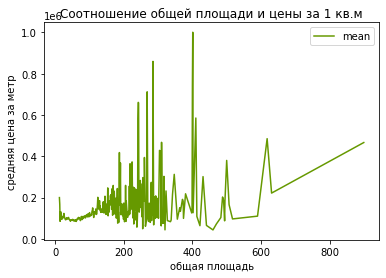

In [60]:
#посмотрим на графике
data_area_grouped.plot(color='#669900')
plt.title('Соотношение общей площади и цены за 1 кв.м')
plt.xlabel('общая площадь')
plt.ylabel('средняя цена за метр')
plt.show()

<b>Вывод:</b> По графику средней и по величине корреляции видим, что зависимость на границе слабой и умереной. 
    Корреляция положительная, значит с ростом площади, тем выше цена. В целом тренд виден и на графику.

#### Зависимость цены от числа комнат

In [61]:
data_rooms_grouped=data_est.pivot_table(index = 'rooms', values = 'price_1m', 
                                 aggfunc = 'mean')
data_rooms_grouped.columns = ['mean']

data_rooms_grouped.head() # просмотр что получилось 

,mean
rooms,
0,109346.905297
1,101484.096187
2,95893.051900
3,97435.504917
4,110569.400800


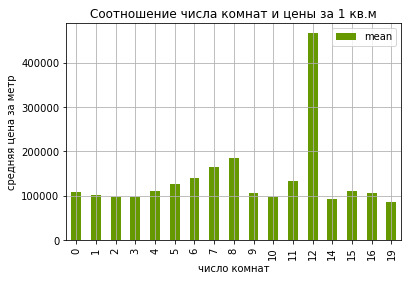

In [62]:
#посмотрим как на графике выглядит в среднем
data_rooms_grouped.plot(kind='bar', grid=True,color='#669900')
plt.title('Соотношение числа комнат и цены за 1 кв.м')
plt.xlabel('число комнат')
plt.ylabel('средняя цена за метр')
plt.show()

<b>Вывод:</b> График не дает полного представления о наличии/отсуствии зависимости

#### Зависимость цены от этажа 

In [63]:
good_floors=data_est.query('floors_total !=0') #искоючение нулевых значений 

data_floor_grouped=good_floors.pivot_table(index = 'status_floor', values = 'price_1m', 
                                       aggfunc = 'mean')
data_floor_grouped.columns = ['mean']

data_floor_grouped.head() # просмотр что получилось 

,mean
status_floor,
другой,103962.685243
первый этаж,82361.497364
последний этаж,93805.634776


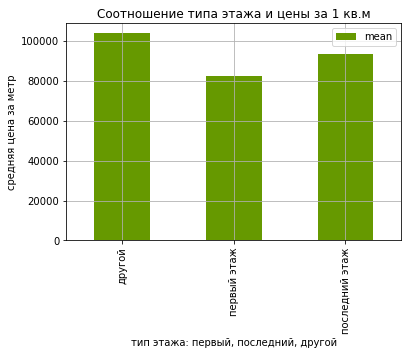

In [64]:
#оценим соотношение
data_floor_grouped.plot(kind='bar',grid=True, color='#669900')
plt.title('Соотношение типа этажа и цены за 1 кв.м')
plt.xlabel('тип этажа: первый, последний, другой')
plt.ylabel('средняя цена за метр')
plt.show()

<b>Вывод:</b> По графику зависимости не видно, но согласно рассчитанной средней самые дешевые квартиры на первом этаже, затем идут квратиры на последнем этаже и самые дорогие если не первый и не последний.

#### Зависимость цены от удаленности от центра

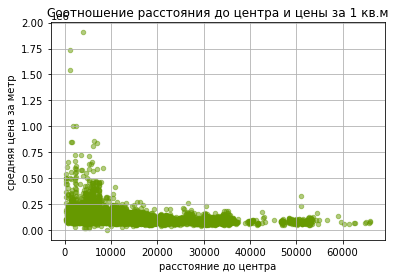

In [65]:
#выделим таблицу, в которой нет нулевых значений
good_data_center=data_est.query('cityCenters_nearest !=0')

#построим график
good_data_center.plot(x='cityCenters_nearest', y='price_1m', kind='scatter', grid=True,alpha=0.5,color='#669900')
plt.title('Соотношение расстояния до центра и цены за 1 кв.м')
plt.xlabel('расстояние до центра')
plt.ylabel('средняя цена за метр')
plt.show()

<b>Вывод:</b> Видна обратная умеренная зависимость, чем дальше от центра, тем ниже цена.
    В целом это соответсвует реальной ситуации.

#### Корреляционный анализ

In [66]:
#создадим таблицу для просмотра корреляции между: ценой за 1 м², общей площадью и расстоянием до центра
data_stat=good_data_center[['price_1m','total_area','rooms','cityCenters_nearest']]
#исколючим нулевые значения
data_stat=data_stat.query('cityCenters_nearest !=0')

data_stat

,price_1m,total_area,rooms,cityCenters_nearest
0,120370.370370,108,3,16028.0
1,83750.000000,40,1,18603.0
2,92785.714286,56,2,13933.0
3,408176.100629,159,3,6800.0
4,100000.000000,100,2,8098.0
...,...,...,...,...
23690,105769.230769,52,2,6263.0
23691,131527.777778,72,2,4489.0
23693,74193.548387,62,3,34104.0
23694,72932.330827,133,3,4232.0


In [67]:
#расчитаем корреляцию для выделенных параметров: цены за 1 м², общей площади и расстояния до центра
data_stat.corr().style.background_gradient('rainbow') 

,price_1m,total_area,rooms,cityCenters_nearest
price_1m,1.000000,0.285627,0.041094,-0.317603
total_area,0.285627,1.000000,0.759324,-0.231466
rooms,0.041094,0.759324,1.000000,-0.184864
cityCenters_nearest,-0.317603,-0.231466,-0.184864,1.000000


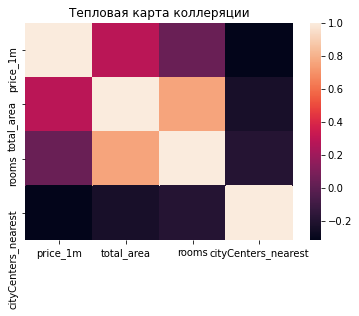

In [68]:
#аналогично можно посмотреть как корреляция выглядит на тепловой карте
sns.heatmap(data_stat.corr())
plt.title('Тепловая карта коллеряции')
plt.show()

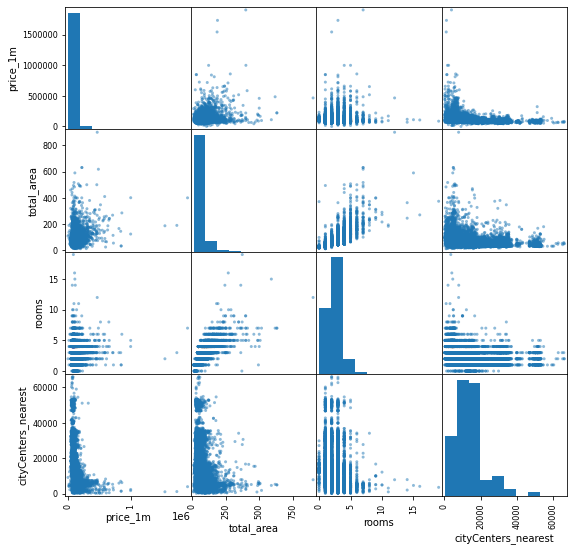

In [69]:
#посмотрим на матрице диаграмм рассеяния
pd.plotting.scatter_matrix(data_stat,figsize=(9,9));

<b>Вывод:</b> По таблице рассчитанной корреляции видим следующее:

цена 1 м² и общая площадь - средняя положительная корреляция (0.29), т.е.чем больше площадь, тем больше цена 1 кв.м


цена 1 м² и число комнат -слабая положительная корреляция (0.04), практически отсутствие зависимости


цена 1 м² и расстояние до центра - средняя отрицательная корреляция (-0.32), т.е.чем дальше от центра, тем несколько дешевле (логично, обычно так и есть)

В челом, это видно и по матрице диаграмм рассеяния.

#### Зависимость цены  от дня недели

In [70]:
data_weekday_grouped = data_est.pivot_table(index = 'day of week', values = 'price_1m', aggfunc = 'mean')
data_weekday_grouped.columns = ['mean'] 

data_weekday_grouped.head()#смотрим что получилось

,mean
day of week,
воскресенье,98141.536663
вторник,100189.261351
понедельник,99887.248354
пятница,99462.889048
среда,100075.045898


In [71]:
#отсортируем по значению индекса

sort_days=['понедельник','вторник','среда','четверг','пятница','суббота','воскресенье']
data_weekday_grouped.index = pd.Categorical(data_weekday_grouped.index, categories=sort_days, ordered=True)
data_weekday_grouped = data_weekday_grouped.sort_index()
data_weekday_grouped.head()

,mean
понедельник,99887.248354
вторник,100189.261351
среда,100075.045898
четверг,100623.723630
пятница,99462.889048


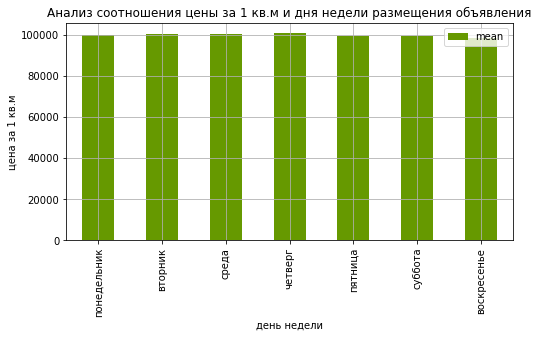

In [72]:
#строим график

data_weekday_grouped.plot(kind='bar', figsize=(8,4), grid=True, color='#669900')
plt.title('Анализ соотношения цены за 1 кв.м и дня недели размещения объявления')
plt.xlabel('день недели')
plt.ylabel('цена за 1 кв.м')
plt.show()

<b>Вывод:</b> В целом нет особой зависимости от дня размещения, все более-менее равномерно

#### Зависимость цены от месяца

In [73]:
data_month_grouped = data_est.pivot_table(index = 'month', values = 'price_1m', aggfunc = 'mean')
data_month_grouped.columns = ['mean'] 

data_month_grouped.head()#смотрим что получилось

,mean
month,
август,100567.377458
апрель,102409.580247
декабрь,100009.354215
июль,100085.697077
июнь,98185.101778


In [74]:
#отсортируем по значению индекса
sort_month=['январь','февраль','март','апрель','май','июнь','июль','август','сентябрь','октябрь','ноябрь','декабрь']
data_month_grouped.index = pd.Categorical(data_month_grouped.index, categories=sort_month, ordered=True)
data_month_grouped = data_month_grouped.sort_index()
data_month_grouped

,mean
январь,100319.027891
февраль,99196.523973
март,99465.477720
апрель,102409.580247
май,98960.643155
июнь,98185.101778
июль,100085.697077
август,100567.377458
сентябрь,100909.319238
октябрь,98413.782099


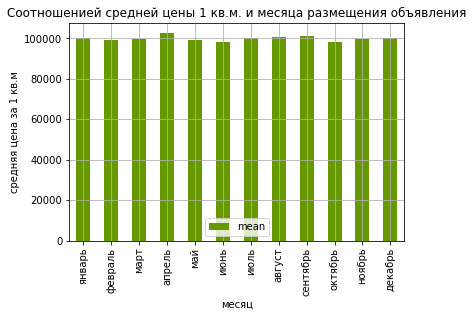

In [75]:
#строим график
data_month_grouped.plot(y='mean',kind='bar', grid=True, color='#669900')
plt.title('Соотношенией средней цены 1 кв.м. и месяца размещения объявления')
plt.xlabel('месяц')
plt.ylabel('средняя цена за 1 кв.м')
plt.show()

<b>Вывод:</b> В целом по месяцам все так же достаочно равномерно, небольшой спад в мае и июне (можно связать со снижением активности летом - отпуска!, снижением спроса и как следствие снижением цены предложения), всплеск в сентябре можно связать, наоборот с ростом спроса. В целом слабая зависимость есть.

#### Зависимость цены от года 

In [76]:
data_year_grouped = data_est.pivot_table(index = 'year', values = 'price_1m', aggfunc = 'mean')
data_year_grouped.columns = ['price_1m'] 
data_year_grouped.head()

,price_1m
year,
2014,125314.312855
2015,104975.773281
2016,98673.569385
2017,98026.132325
2018,98279.943073


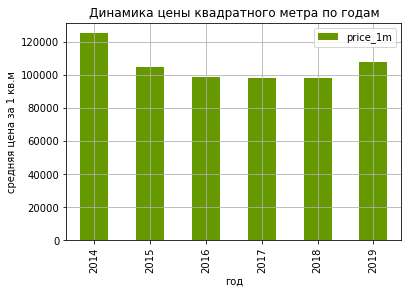

In [77]:
#строим гистограмму
data_year_grouped.plot(y='price_1m',kind='bar', grid=True, color='#669900')
plt.title('Динамика цены квадратного метра по годам')
plt.xlabel('год')
plt.ylabel('средняя цена за 1 кв.м')
plt.show()

<b>Вывод:</b> Заметно, что за период 2015-2018 было снижение цены за 1 кв.м, возможно это связано с экономическим кризисом или падением спроса? В 2019, наоборот, наблюдается рост. Интересно было бы посмотреть что в 2020-2021 после пандемии:)

### 5. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [78]:
data_top10=data_est[['locality_name','price_1m']]
data_top10['count_loc']=1

data_top10=data_top10.pivot_table(index='locality_name',values=['price_1m','count_loc'],aggfunc=['median','sum'])

data_top10.columns=['count','mean_1m','count_ad','total_price']
data_top10.pop('count')
data_top10.pop('total_price')
data_top10.sort_values(by='count_ad',ascending=False, inplace=True)
data_top10=data_top10.iloc[:10] 
data_top10

,mean_1m,count_ad
locality_name,,
санкт-петербург,105263.157895,15721
поселок мурино,86410.969793,556
поселок шушары,77223.320158,440
всеволожск,65811.403509,398
пушкин,100000.000000,369
колпино,74861.111111,338
поселок парголово,92222.222222,327
гатчина,67924.528302,307
деревня кудрово,92647.058824,299


In [79]:
data_top10['mean_1m'][data_top10['mean_1m'] == data_top10['mean_1m'].max()]

locality_name
санкт-петербург    105263.157895
Name: mean_1m, dtype: float64

In [80]:
data_top10['mean_1m'][data_top10['mean_1m'] == data_top10['mean_1m'].min()]

locality_name
выборг    58333.333333
Name: mean_1m, dtype: float64

In [81]:
print('Минимальная средняя стоимость жилья в городе :',data_top10['mean_1m'].idxmin(),'.', 'Она составляет: ', int(data_top10['mean_1m'].min()),'рублей/кв.м')

Минимальная средняя стоимость жилья в городе : выборг . Она составляет:  58333 рублей/кв.м


In [82]:
print('Максимальная средняя стоимость жилья в городе :',data_top10['mean_1m'].idxmax(),'.', 'Она составляет: ',int(data_top10['mean_1m'].max()),'рублей/кв.м')

Максимальная средняя стоимость жилья в городе : санкт-петербург . Она составляет:  105263 рублей/кв.м


### 6.  Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [83]:
#добавляем столбец с расстоянием в км
data_est['center_km']=round(data_est['cityCenters_nearest']/1000,0) 

#выделяем квартиры в Санкт-Петербурге
good_data_piter=data_est.query('locality_name == "санкт-петербург" and cityCenters_nearest !=0') 

#делаем сводную таблицу
data_piter=good_data_piter.pivot_table(index='center_km',values='price_1m',aggfunc='mean')

#смотрим что получилось
data_piter.head(10)

,price_1m
center_km,
0.0,246422.476368
1.0,177335.319769
2.0,158225.989174
3.0,121744.829735
4.0,133720.554539
5.0,140954.869248
6.0,151487.138266
7.0,156727.740036
8.0,126170.725041


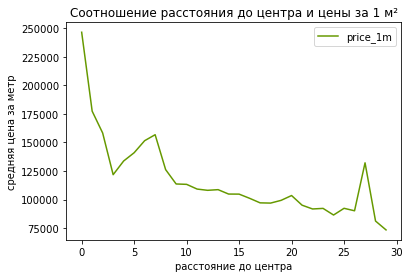

In [84]:
#строим график
data_piter.plot(color='#669900')
plt.title('Соотношение расстояния до центра и цены за 1 м²')
plt.xlabel('расстояние до центра')
plt.ylabel('средняя цена за метр')
plt.show()

<b> Вывод: </b> График сильно меняется на значении 3 км, с этой точки начинается резкий рост цены, вероятно именно этот радиус можно считать условным центром.

### 7. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [85]:
#выделение квартир в радиусе 7 км
good_data_piter=good_data_piter.query('center_km<=7')

In [86]:
#площадь по Санкт-Петербургу
good_data_piter['total_area'].describe()

count    3525.000000
mean       92.951206
std        59.493501
min        12.000000
25%        57.000000
50%        78.000000
75%       110.000000
max       631.000000
Name: total_area, dtype: float64

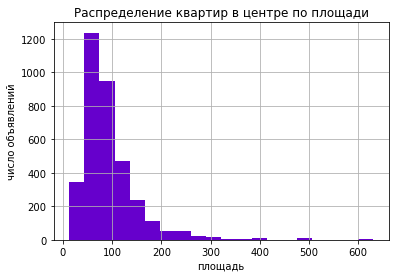

In [87]:
good_data_piter['total_area'].hist(bins=20, color='#6600CC')
plt.title('Распределение квартир в центре по площади')
plt.xlabel('площадь')
plt.ylabel('число объявлений')
plt.show()

In [88]:
#для удобства просмотра преобразуем цену в тыс.руб
good_data_piter['last_price']=good_data_piter['last_price']/1000

#просмотр распределения цены по центральной части Санкт-Петербурга
good_data_piter['last_price'].describe()

count      3525.000000
mean      14895.529447
std       24320.912345
min        1600.000000
25%        6690.000000
50%        9200.000000
75%       14500.000000
max      763000.000000
Name: last_price, dtype: float64

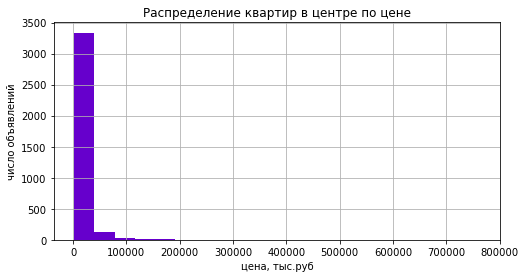

In [89]:
#просмотр распределения цены по центральной части Санкт-Петербурга на графике
good_data_piter['last_price'].hist(bins=20, figsize=(8,4), color='#6600CC')
plt.title('Распределение квартир в центре по цене')
plt.xlabel('цена, тыс.руб')
plt.ylabel('число объявлений')
plt.show()

In [90]:
#число комнат по центральной части Санкт-Петербурга
good_data_piter['rooms'].describe()

count    3525.000000
mean        2.834326
std         1.449808
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

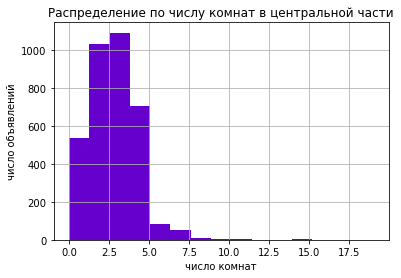

In [91]:
#число комнат по центральной части Санкт-Петербурга на гистограмме
good_data_piter['rooms'].hist(bins=15, color='#6600CC')
plt.title('Распределение по числу комнат в центральной части')
plt.xlabel('число комнат')
plt.ylabel('число объявлений')
plt.show()

In [92]:
#высота потолков в квратирах по центральной части Санкт-Петербурга
good_data_piter['ceiling_height'].describe()

count    3525.000000
mean        2.022451
std         1.646345
min         0.000000
25%         0.000000
50%         2.800000
75%         3.150000
max        32.000000
Name: ceiling_height, dtype: float64

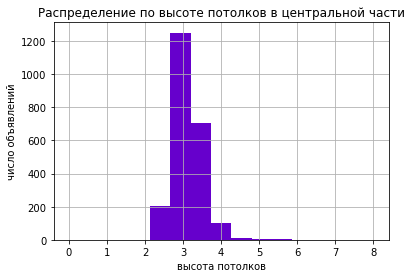

In [93]:
#высота потолков в квратирах по центральной части Санкт-Петербурга на гистограмме
good_data_piter=good_data_piter.query('ceiling_height !=0') #без нулей
good_data_piter['ceiling_height'].hist(bins=15, range=(0,8), color='#6600CC')
plt.title('Распределение по высоте потолков в центральной части')
plt.xlabel('высота потолков')
plt.ylabel('число объявлений')
plt.show()

<b>Вывод: </b> В целом распределение по всем основным параметрам более равномерное, чем в основной выборке. Присутствуют нулевые значения (они были оставлены вместо пропуском и теперь видны на распределении).

#### Зависимость цены от числа комнат для центра Санкт-Петербурга

In [94]:
piter_rooms_grouped=good_data_piter.pivot_table(index = 'rooms', values = 'price_1m', 
                                       aggfunc = 'mean')
piter_rooms_grouped.columns = ['mean']

piter_rooms_grouped.head() # просмотр что получилось 

,mean
rooms,
0,149870.042070
1,158201.946096
2,144765.545611
3,143381.659981
4,139103.246224


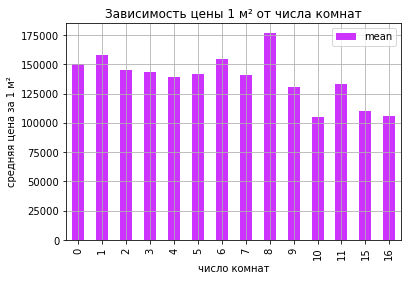

In [95]:
#посмотрим как на графике выглядит в среднем
piter_rooms_grouped.plot(kind='bar', grid=True, color='#CC33FF')
plt.title('Зависимость цены 1 м² от числа комнат')
plt.xlabel('число комнат')
plt.ylabel('средняя цена за 1 м²')
plt.show()

#### Зависимость цены от этажа для центра Санкт-Петербурга

In [96]:
good_floors2=good_data_piter.query('floors_total !=0') #искоючение нулевых значений 

piter_floor_grouped=good_floors2.pivot_table(index = 'status_floor', values = 'price_1m', 
                                       aggfunc = 'mean')
piter_floor_grouped.columns = ['mean']

piter_floor_grouped.head() # просмотр что получилось 

,mean
status_floor,
другой,150020.208386
первый этаж,124525.211819
последний этаж,139964.953181


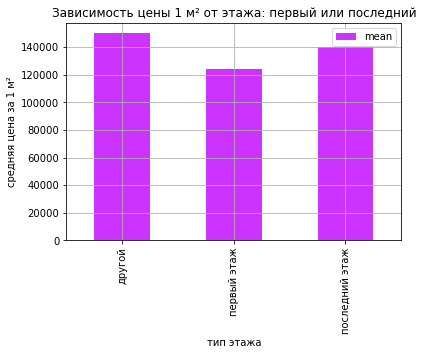

In [97]:
#посмотрим как на графике выглядит по среднем
piter_floor_grouped.plot(kind='bar', grid=True, color='#CC33FF')
plt.title('Зависимость цены 1 м² от этажа: первый или последний')
plt.xlabel('тип этажа')
plt.ylabel('средняя цена за 1 м²')
plt.show()

<b>Вывод:</b> Ситуация схожа с основной выборкой: самый дешевый - первый этаж, затем - последний и самые дорогие предложения те, что не на первом и ни на последнем этажах.

#### Зависимость цены от удаленности от центра для Санкт-Петербурга

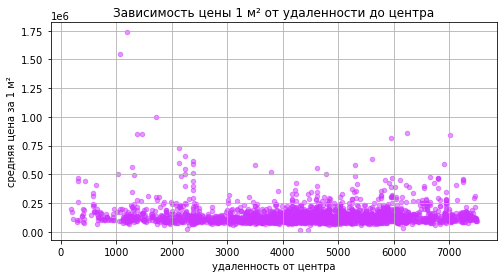

In [98]:
#выделим таблицу, в которой нет нулевых значений
good_data_center2=good_data_piter.query('cityCenters_nearest !=0')

#построим график
good_data_center2.plot(x='cityCenters_nearest', y='price_1m', kind='scatter', figsize=(8,4),grid=True,alpha=0.5,color='#CC33FF')
plt.title('Зависимость цены 1 м² от удаленности до центра')
plt.xlabel('удаленность от центра')
plt.ylabel('средняя цена за 1 м²')
plt.show()

#### Корреляция

In [99]:
#создадим таблицу для просмотра корреляции между: ценой за 1 м², общей площадью и расстоянием до центра по центральной части Санкт-Петербурга
data_piter_stat=good_data_piter[['price_1m','total_area','rooms','cityCenters_nearest']]

#исколючим нулевые значения
data_piter_stat=data_piter_stat.query('cityCenters_nearest !=0')

data_piter_stat

,price_1m,total_area,rooms,cityCenters_nearest
51,279503.105590,161,3,6589.0
52,86727.941176,136,6,6582.0
63,169491.525424,118,3,4800.0
94,120689.655172,29,1,7303.0
106,84677.419355,124,5,5527.0
...,...,...,...,...
23648,129487.179487,78,3,1113.0
23664,81818.181818,110,4,5016.0
23681,122093.023256,43,2,7262.0
23691,131527.777778,72,2,4489.0


In [100]:
#расчитаем корреляцию для выделенных параметров: цены за 1 м², общей площади и расстояния до центра по центральной части СПб
data_piter_stat.corr().style.background_gradient('rainbow') 

,price_1m,total_area,rooms,cityCenters_nearest
price_1m,1.000000,0.203158,-0.034901,-0.026011
total_area,0.203158,1.000000,0.732186,-0.088174
rooms,-0.034901,0.732186,1.000000,-0.166846
cityCenters_nearest,-0.026011,-0.088174,-0.166846,1.000000


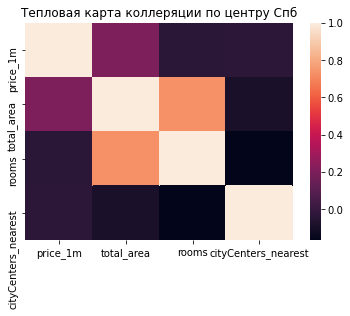

In [101]:
#аналогично можно посмотреть как корреляция выглядит на тепловой карте
sns.heatmap(data_piter_stat.corr())
plt.title('Тепловая карта коллеряции по центру Спб')
plt.show()

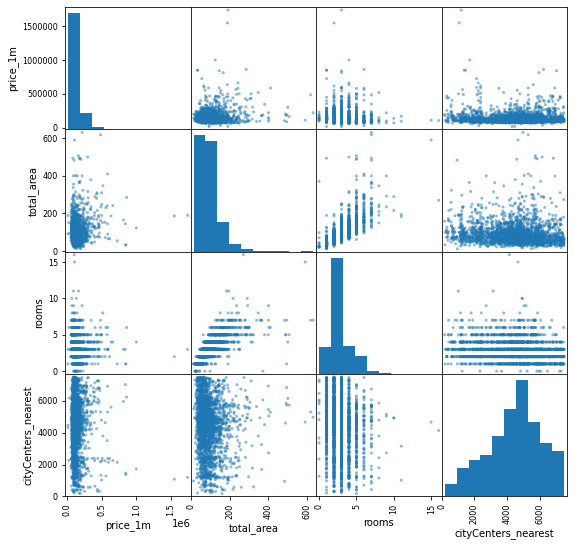

In [102]:
#посмотрим на матрице диаграмм рассеяния
pd.plotting.scatter_matrix(data_piter_stat,figsize=(9,9));

<b>Вывод:</b> По таблице рассчитанной корреляции и по матрице диаграмм рассеяния для центральной части СПб видим следующее:

цена 1 м² и общая площадь - средняя положительная корреляция (0.24), т.е.чем больше площадь, тем больше цена 1 кв.м, ситуация похожа на общую выборку

цена 1 м² и число комнат - слабая положительная корреляция (-0.004), практически отсутствие зависимости, однако иной характер, нежели в общей выборке, т.е. чем больше площадь, тем меньше комнат. Возможно эта особенность центральной части города, жилье  более просторное, комнаты больше.

цена 1 м² и расстояние до центра - слабая отрицательная корреляция (-0.02), зависимости почти нет, говорит о том, что в центре в целом цена за 1 кв.м. слабо зависит от общей площади, если посмотреть распределение по цене, то видно, что она слабо меняется



#### Зависимость цены  от дня недели для центра Санкт-Петербурга

In [103]:
piter_weekday_grouped = good_data_piter.pivot_table(index = 'day of week', values = 'price_1m', aggfunc = 'mean')
piter_weekday_grouped.columns = ['mean'] 

#смотрим что получилось
piter_weekday_grouped.head()


,mean
day of week,
воскресенье,150215.179319
вторник,145700.922222
понедельник,145143.782836
пятница,145673.061708
среда,143224.435478


In [104]:
#отсортируем по значению индекса
piter_weekday_grouped.index = pd.Categorical(piter_weekday_grouped.index, categories=sort_days, ordered=True)
piter_weekday_grouped = piter_weekday_grouped.sort_index()
piter_weekday_grouped

,mean
понедельник,145143.782836
вторник,145700.922222
среда,143224.435478
четверг,147062.789825
пятница,145673.061708
суббота,140166.761404
воскресенье,150215.179319


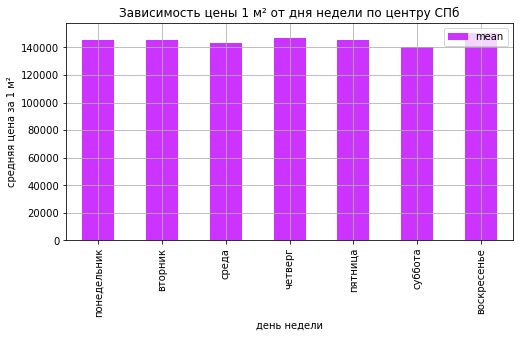

In [105]:
#строим график
piter_weekday_grouped.plot(y='mean',kind='bar',figsize=(8,4),color='#CC33FF',grid=True) 
plt.title('Зависимость цены 1 м² от дня недели по центру СПб')
plt.xlabel('день недели')
plt.ylabel('средняя цена за 1 м²')
plt.show()

В целом распределение равномерное, небольщой всплеск в субботу, т.е. цена за 1 кв.м. для предложений, размещенных в субботу выше. 

#### Зависимость цены от месяца для центра Санкт-Петербурга

In [106]:
piter_month_grouped = good_data_piter.pivot_table(index = 'month', values = 'price_1m', aggfunc = 'mean')
piter_month_grouped.columns = ['mean'] 

piter_month_grouped.head()#смотрим что получилось

,mean
month,
август,144853.827443
апрель,166387.422176
декабрь,146310.674796
июль,147103.480745
июнь,133812.580232


In [107]:
#отсортируем по значению индекса

piter_month_grouped.index = pd.Categorical(piter_month_grouped.index, categories=sort_month, ordered=True)
piter_month_grouped = piter_month_grouped.sort_index()
piter_month_grouped

,mean
январь,146619.020909
февраль,144282.668039
март,144312.009571
апрель,166387.422176
май,139403.197215
июнь,133812.580232
июль,147103.480745
август,144853.827443
сентябрь,143032.413564
октябрь,141247.629291


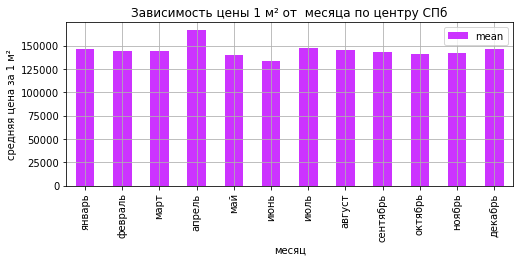

In [108]:
#строим график
piter_month_grouped.plot(y='mean',kind='bar',figsize=(8,3),color='#CC33FF',grid=True) 
plt.title('Зависимость цены 1 м² от  месяца по центру СПб')
plt.xlabel('месяц')
plt.ylabel('средняя цена за 1 м²')
plt.show()

Некоторое проседание по цене  с мая по октябрь (август-сентябрь всплеск), чуть более хаотичная картина, чем для общей выборки

#### Зависимость цены от года для центра Санкт-Петербурга

In [109]:
piter_year_grouped = good_data_piter.pivot_table(index = 'year', values = 'price_1m', aggfunc = 'mean')
piter_year_grouped.columns = ['mean'] 
piter_year_grouped.head(10)

,mean
year,
2014,177802.970302
2015,151377.975617
2016,139973.045542
2017,144163.954300
2018,139567.601901
2019,161947.889681


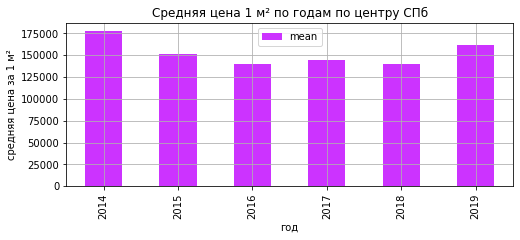

In [110]:
#строим график
piter_year_grouped.plot(y='mean',kind='bar',figsize=(8,3),color='#CC33FF',grid=True) 
plt.title('Средняя цена 1 м² по годам по центру СПб')
plt.xlabel('год')
plt.ylabel('средняя цена за 1 м²')
plt.show()

Наблюдается спад в цене в периоде 2015-2018 год, рост с 2019.

<b>ВЫВОД:</b>

### Шаг 5. Общий вывод

1. Выполнен предварительный анализ данных, выявлены пропущенные значения; выполнена предобработка данных, в рамках которой произведены целесообразные замены значений и типов данных. 

2. Рассчитаны и добавлены следующие столбцы с данными:
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
-категория этажа квартиры (первый, последний, другой);
-соотношение жилой и общей площади, а также отношение площади кухни к общей.

3. Проведен исследовательский анализ данных, в рамках которого:
- проанализированы следующие параметры: площадь, цена, число комнат, высота потолков. Определены базовые статистические параметры (медиана, среднее), построены диаграммы размаха и гистограммы, выявлены максимальные и минимальные значения. Составлено представление о том, что в целом из себя представляют рассмотренные показатели.
- изучено время продажи квартиры, выявлены и устранены аномалии;
-изучены факторы, влияющие на стоимость квартиры. Установлена умеренная зависимость стоимости 1 кв.м. от площади и удаленности от центра, выявлена сезонность в зависимости цены от месяца размещения объявления, определен тренд в изменении цены в зависимости от года (спад до 2018 года и устойчивый рост после).-установлен радиус центра города по Санкт-Петербургу, выделены и проанализированы параметры (площадь, цена, число комнат, высота потолков), зависимость цены от числа комнат, этажа, удалённости от центра, даты размещения объявления. Установлено, что данные распределены в целом так же, как и основная выборка, однако есть отличие в зависимости цены от году публикации: рост начался на год раньше.

4. Установлено, что в большинстве случаев рыночная стоимость 1 м² зависит от:

- расстояния до центра (чем ближе к центру, тем дороже 1 м²);

- от этажа (первый и последний этаж дешевле);

- общей площади.

Для центральной части Санкт-Петербурга установлено, что цена 1 м² в целом более-менее одинакова и уже в целом не зависит от того в какой части центра расположена квартира. Зато присуствует небольшая сезонность в колебании цены от месяца размещения объявления.

Так же обнаружены странные, аномальные значения в различных столбцах.

Важно обратить внимание на те объявления, в которых присутствуют подобные аномальные значения (потолки высотой 100 м, либо число комнат от 10) и попытаться проанализировать причину возникновения подобных «странных» значений (возможно это ошибки выгрузки или заполнения), ведь это влияет на отношение (доверие) клиента, просматривающего объявление.

Так же следует обратить внимание на те объявления, в которых слишком много пропусков по всем столбцам. Обычно продавец старается указать как можно больше полезной информации о квартире, «рекламируя» ее, не является ли отсутствие данных подозрительным? Возможно при построении автоматизированной системы делать заполнение некоторых столбцов обязательным?
